In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential
from sklearn.model_selection import train_test_split

from traffic import load_data as ld

In [3]:
images, labels = ld('../gtsrb/')
num_classes = 43

x_train, x_test, y_train, y_test = train_test_split(
    np.array(images), np.array(labels), test_size=0.2
)

""" Standardize the data """
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [4]:
# Model

model_1 = Sequential([
    layers.Conv2D(128, (3, 3), activation='relu', input_shape=(30, 30, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model_1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [5]:
tf.config.list_physical_devices('GPU')
tf.debugging.set_log_device_placement(True)


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [6]:
epochs = 10
history = model_1.fit(
    x_train, y_train, 
    validation_data=(x_test, y_test), 
    epochs=epochs
)

Epoch 1/10
666/666 [==============================] - 10s 7ms/step - loss: 2.2984 - accuracy: 0.3304 - val_loss: 0.9795 - val_accuracy: 0.6729
Epoch 2/10
666/666 [==============================] - 5s 7ms/step - loss: 0.7607 - accuracy: 0.7445 - val_loss: 0.2830 - val_accuracy: 0.9129
Epoch 3/10
666/666 [==============================] - 4s 7ms/step - loss: 0.4186 - accuracy: 0.8628 - val_loss: 0.1719 - val_accuracy: 0.9486
Epoch 4/10
666/666 [==============================] - 4s 7ms/step - loss: 0.2903 - accuracy: 0.9040 - val_loss: 0.1400 - val_accuracy: 0.9561
Epoch 5/10
666/666 [==============================] - 4s 7ms/step - loss: 0.2298 - accuracy: 0.9253 - val_loss: 0.0990 - val_accuracy: 0.9726
Epoch 6/10
666/666 [==============================] - 4s 7ms/step - loss: 0.1918 - accuracy: 0.9369 - val_loss: 0.1166 - val_accuracy: 0.9610
Epoch 7/10
666/666 [==============================] - 4s 7ms/step - loss: 0.1692 - accuracy: 0.9461 - val_loss: 0.0697 - val_accuracy: 0.9786
Epoch

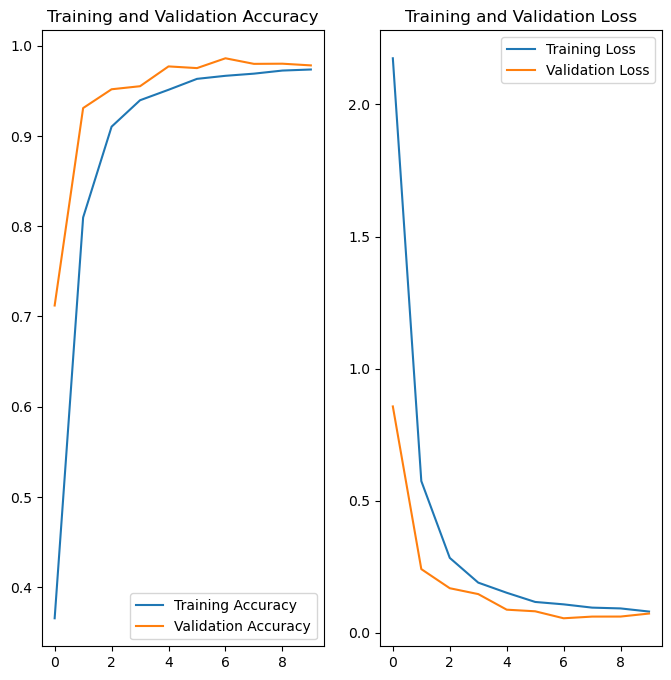

In [13]:
""" Visualize result """

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [14]:
model_name_saved = "model_08-02.h5"

# Evaluate with designated test data
model_1.evaluate(x_test, y_test)
model_1.save(model_name_saved)

167/167 [==============================] - 1s 9ms/step - loss: 0.0724 - accuracy: 0.9782


In [15]:
model_loaded = keras.models.load_model(model_name_saved)

In [8]:
images_, labels_ = ld('../jpeg')
images_ = np.array(images_) / 255.0

1.0
0.99999917
0.9995315
0.99831617
0.9986726
0.77370447
0.99881816
0.9999012
0.99999917
1.0


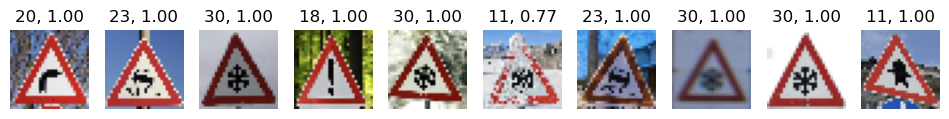

In [16]:
plt.figure(figsize=(12,12))
for i in range(len(images_)):
    plt.subplot(1, len(images_), i+1)
    plt.imshow(images_[i])
    plt.axis("off")
    predictions = model_loaded(tf.expand_dims(images_[i], 0))
    plt.title("{}, {}".format(np.where(predictions == np.max(predictions))[1][0], '%.2f'%np.max(predictions)))
    # plt.title((np.where(predictions == np.max(predictions))[1][0]))
    # print(np.where(predictions == np.max(predictions))[1][0])
    print(np.max(predictions))

plt.figure(figsize=(12,12))
plt.subplot(1, 2, 1)
plt.imshow(images_[1])

plt.subplot(1, 2, 2)
plt.imshow(images_[2])